# Convoluciones 2D
En este ejercicio implementaremos convoluciones en 2D utilizando numpy. El objetivo es comprender el funcionamiento de estas operaciones para luego poder utilizarlas de manera mas eficaz al definir redes neuronales.

Comenzaremos implementando convoluciones 2D en imagenes de escala de grises (un solo canal de color). Implementaremos primero una versión sin stride, y luego una con ello. Por último implementaremos una versión 2D que permita procesar imagenes con varios canales, ya sea una imagen RGB (tres canales) o un feature map con una cantidad arbitraria de canales.

En este notebook mostraremos imágenes y animaciones de:
* [1] Vincent Dumoulin, Francesco Visin - [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285)
* [2] Arden Dertat [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)
* [3] [cs231 stanford](http://cs231n.github.io/convolutional-networks/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

def equal_array(verdadero,calculado):
    if verdadero.shape != calculado.shape:
        print("Incorrecto: Los vectores tienen tamaños distintos")
        print("verdadero.shape = ", verdadero.shape)
        print("calculado.shape = ", calculado.shape)
        return False
    equals=np.all(verdadero==calculado)
    if equals:
        print("Correcto: Los arreglos son iguales.")
        return True
    else:
        print("Incorrecto: Los arreglos no son iguales.")
        print("Debió obtener:")
        print(verdadero)
        print("Obtuvo:")
        print(calculado)
        return False

def impar(x): 
    return x%2 == 1


def dibujar_imagenes(x,y,y_verdadero,vmax,vmin=0):
    
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,10))
    ax1.imshow(x,cmap="gray",vmin=vmin,vmax=vmax)
    ax1.set_title("Imagen original")
    ax2.imshow(y_verdadero,cmap="gray",vmin=vmin,vmax=vmax)
    ax2.set_title("Imagen esperada")
    ax3.imshow(y,cmap="gray",vmin=vmin,vmax=vmax)
    ax3.set_title("Imagen calculada")
    
def dibujar_imagenes_rgb(x_rgb,y,y_verdadero):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,10))
    ax1.imshow(x_rgb)
    ax1.set_title("Imagen original")
    
    ax2.imshow(y_verdadero[:,:,0],cmap="gray")
    ax2.set_title("Imagen esperada")
    ax3.imshow(y[:,:,0],cmap="gray")
    ax3.set_title("Imagen calculada")
    

## 1. Convoluciones 2D
En este ejercicio deberas implementar convoluciones para señales de 2D (imágenes). Esto quiere decir que el vector de entrada `x` tiene dos dimensiones, así como el vector de pesos `w`.

Ejemplo 1: 
![](conv2d/no_padding_no_strides.gif)

Ejemplo 2:
![](conv2d/tds1.png)
![](conv2d/tds2.png)
![](conv2d/tds3.png)

Ejemplo 2 (animado):
![](conv2d/tds.gif)


Correcto: Los arreglos son iguales.


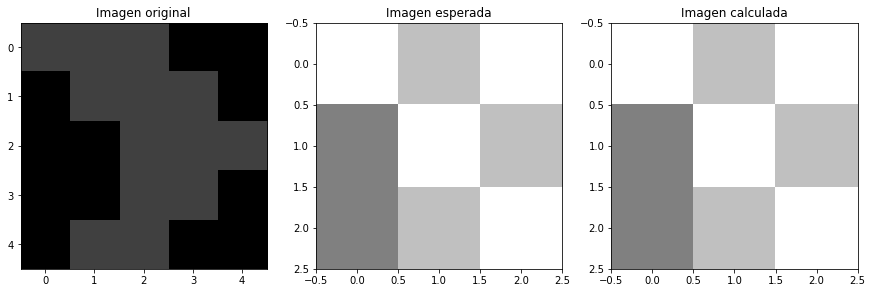

In [9]:
def conv2d_simple(w, x):
    # NOTA: el vector de pesos se llama `w`
    # pero también se le dice `w` al ancho de la imagen
    # por `width`. Al alto se le dice `h` por height
    
    hx,wx = x.shape #Dims de la matriz de entrada (imagen), alto y ancho
    hd,wd = w.shape #Dims de la matriz de pesos, alto y ancho
    assert impar(hd) and impar(wd), "Las dimensiones de w deben ser números impares"
    hy = hx - hd + 1 #Alto de la matriz de salida (imagen)
    wy = wx - wd + 1 #Ancho de la matriz de salida (imagen)
    y = np.zeros( (hy,wy) ) #Vector de salida
    
    for ih in range(0, hy):
        for iw in range(0, wy):
            submat = x[ih:ih+hd, iw:iw+wd]
            y[ih, iw] = (submat * w).sum()
   
    return y

w = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]
             ])

x = np.array ([[1,1,1,0,0],
               [0,1,1,1,0],
               [0,0,1,1,1],
               [0,0,1,1,0],
               [0,1,1,0,0]
              ])

y_verdadero = np.array([[4,3,4],
                        [2,4,3],
                        [2,3,4],
                       ])
y = conv2d_simple(w, x)

equal_array(y_verdadero, y)

dibujar_imagenes(x,y,y_verdadero,vmax=4)


## 2. Convoluciones 2D con stride
En este ejercicio deberas agregar la capacidad de hacer convoluciones con stride mayores a 1.  En este caso, tenemos dos parámetros de stride, que llamaremos `(stride_h,stride_w)`, para ver cuánto saltar verticalmente y horizontalmente.

Ten en cuenta que ahora la imagen resultante va a ser más chica si algún stride es mayor a 1. 

Ejemplo con `stride = 2`: 
![](conv2d/no_padding_strides.gif)


Otro ejemplo con `stride = 2`: 
![](conv2d/tds_stride.gif)

Correcto: Los arreglos son iguales.


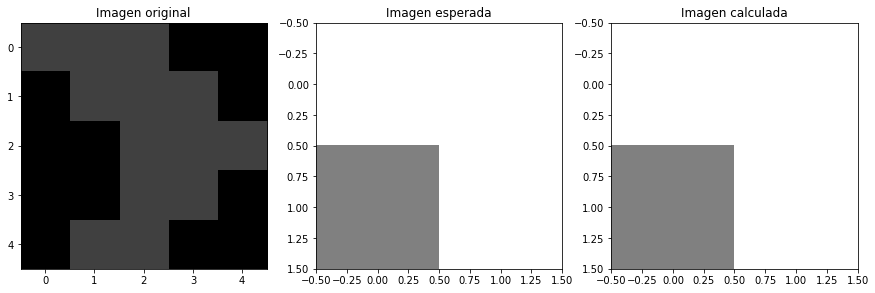

In [12]:
def conv2d_stride(w, x,strides):
    # NOTA: el vector de pesos se llama `w`
    # pero también se le dice `w` al ancho de la imagen
    # por `width`. Al alto se le dice `h` por height
    
    stride_h,stride_w=strides
    
    hx,wx = x.shape #Dims de la matriz de entrada (imagen), alto y ancho
    hd,wd = w.shape #Dims de la matriz de pesos, alto y ancho
    assert impar(hd) and impar(wd), "Las dimensiones de w deben ser números impares"
    hy = int( (hx - hd)/stride_h) + 1 #Alto de la matriz de salida (imagen)
    wy = int( (wx - wd)/stride_w) + 1 #Ancho de la matriz de salida (imagen)
    y = np.zeros( (hy,wy) ) #Vector de salida
    
     ## TODO : COMPLETAR
     #Calcular la convolución y guardarla en el vector Y
     # Pista: Usar un doble for y las variables hy/wy
    for ih in range(0, hy*stride_h, stride_h):
        for iw in range(0, wy*stride_w, stride_w):
            actual_h = ih//stride_h
            actual_w = iw//stride_h
            
            submat = x[ih:ih+hd, iw:iw+wd]
            
            y[actual_h, actual_w] = (submat * w).sum()
     ## FIN TODO    
    
    return y

w = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]
             ])

x = np.array ([[1,1,1,0,0],
               [0,1,1,1,0],
               [0,0,1,1,1],
               [0,0,1,1,0],
               [0,1,1,0,0]
              ])

y_verdadero = np.array([[4,4],
                        [2,4],
                       ])
strides=(2,2)
y = conv2d_stride(w, x,strides)

equal_array(y_verdadero, y)

dibujar_imagenes(x,y,y_verdadero,vmax=4)


## 3. Padding para conservar la dimensión
Como habrás notado al aplicar la convolución en los bordes el tamaño de la imagen de salida es menor que la de entrada, aún cuando `stride = 1`.

Por ejemplo, sí el tamaño de `w` es 3x3, la salida tendrá dos filas y dos columnas menos, ya que se pierde una columna a la izquierda y otra a la derecha de la imagen, y lo mismo con las filas abajo y arriba.

Sí el tamaño de `w` es 5x5 entonces la salida tendrá 4 filas y columnas menos, 2 a la izquierda de `x`, 2 a la derecha, 2 abajo y 2 arriba

Una manera de evitar esto es rellenar la imagen de entrada con 0 en los bordes, agregando filas y columnas. Este proceso se llama agregar *padding*. Eligiendo el tamaño del relleno con cuidado podemos lograr que el tamaño de la imagen de salida sea igual que la de entrada (o mayor, si es necesario).

Implementa la función `pad2d_1canal` que rellena un imagen (matriz 2D) con `0` en los bordes.


Correcto: Los arreglos son iguales.


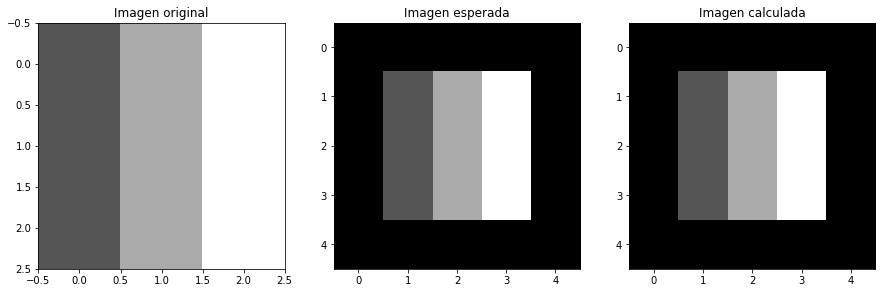

In [13]:
def pad2d_1canal(x, pad_size):
    h,w=x.shape
    new_shape = (h+2*pad_size,w+2*pad_size)
    x_relleno = np.zeros(new_shape )
    x_relleno[pad_size:pad_size+h, pad_size:pad_size+w] = x.copy()
    return x_relleno

x = np.array([[1.0, 2, 3],
              [1.0, 2, 3],
              [1.0, 2, 3]
             ])
x_relleno = pad2d_1canal(x, 1)
x_relleno_verdadero = np.array([[0,   0, 0, 0, 0],
                                [0, 1.0, 2, 3, 0],
                                [0, 1.0, 2, 3, 0],
                                [0, 1.0, 2, 3, 0],
                                [0,   0, 0, 0, 0]
                               ])

equal_array(x_relleno_verdadero, x_relleno)

dibujar_imagenes(x,x_relleno,x_relleno_verdadero,vmax=3)


## 4. Convoluciones con padding

Implementa la función `conv2d_1canal` para que soporte el parametro `pad_size`. Antes de realizar la convolución, debe llamar a la función `pad2d_1canal` para generar un `x` relleno. 

![](conv2d/tds_padding.gif)
![](conv2d/same_padding_no_strides.gif)

Correcto: Los arreglos son iguales.


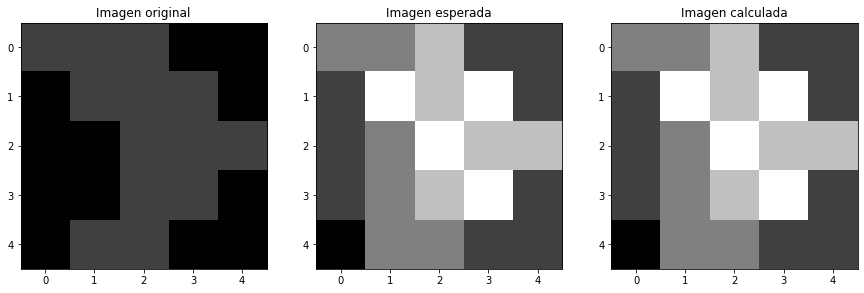

In [14]:
def conv2d_1canal(w, x, strides = (1,1), pad_size = 0):
    
    x_relleno = pad2d_1canal(x, pad_size)
    
    return conv2d_stride(w, x_relleno, strides)

w = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]
             ])

x = np.array ([[1,1,1,0,0],
               [0,1,1,1,0],
               [0,0,1,1,1],
               [0,0,1,1,0],
               [0,1,1,0,0]
              ])

y_verdadero = np.array([[2.,2,3,1,1],
                        [1, 4,3,4,1],
                        [1, 2,4,3,3],
                        [1, 2,3,4,1],
                        [0,2,2,1,1],
                       ],dtype=float)
y = conv2d_1canal(w, x,pad_size=1)

equal_array(y_verdadero, y)

dibujar_imagenes(x,y,y_verdadero,vmax=4)


## 5. Convoluciones 2D con varios canales

Hasta ahora, las convoluciones siempre han sido sobre imágenes en escala de grises, es decir, con un solo canal. 

En este ejercicio deberás volver a implementar la convolución 2D, pero ahora para imágenes con varios canales. Es decir, `x` tiene la forma `(h,w,c)`, donde `h` es el alto, `w` el ancho y `c` la cantidad de canales. De la misma forma, ahora `w` tiene también tiene 3 dimensiones `(h,w,c)`; en este caso, el alto y el ancho son del filtro, por ende pueden ser distintos que el de `x`, pero la cantidad de canales debe ser la misma.

![](conv2d/conv2drgb.gif)





Correcto: Los arreglos son iguales.


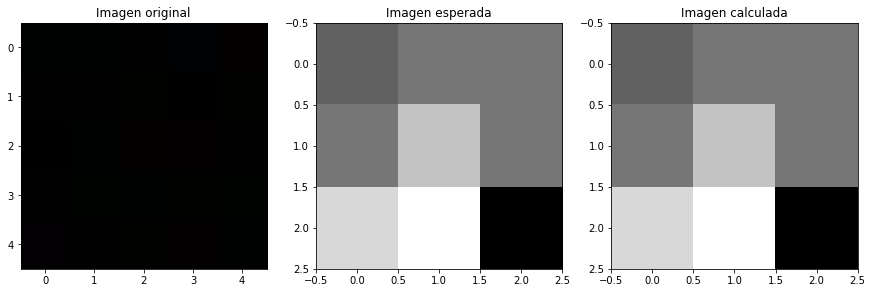

In [17]:
def pad2d(x, pad_size):
    h,w,c=x.shape
    new_shape = (h+2*pad_size,w+2*pad_size,c)
    x_relleno = np.zeros(new_shape)
    x_relleno[pad_size: -pad_size, pad_size: -pad_size, :] = x[:,:,:].copy()
    return x_relleno

def conv2d(w, x, strides = (1,1), pad_size = 0):
    
    if pad_size>0:
        x = pad2d(x, pad_size)
        
    stride_h,stride_w=strides
    
    hx,wx,c = x.shape #Dims de la matriz de entrada (imagen), alto y ancho
    hd,wd,cd = w.shape #Dims de la matriz de pesos, alto y ancho
    assert impar(hd) and impar(wd), "Las dimensiones de w deben ser números impares"
    assert c==cd, "La cantidad de canales del vector de pesos debe ser igual a la cantidad de canales de la imagen"
    
    hy = int( (hx - hd)/stride_h) + 1 #Alto de la matriz de salida (imagen)
    wy = int( (wx - wd)/stride_w) + 1 #Ancho de la matriz de salida (imagen)
    y = np.zeros( (hy,wy,1) ) #Vector de salida

     ## TODO : COMPLETAR
     #Calcular la convolución y guardarla en el vector Y
     # Pista: Usar un doble for y las variables hy/wy

    for ih in range(0, hy*stride_h, stride_h):
        for iw in range(0, wy*stride_w, stride_w):
            actual_h = ih//stride_h
            actual_w = iw//stride_h
            
            submat = x[ih:ih+hd, iw:iw+wd,:]
            
            y[actual_h, actual_w] = (submat * w).sum()
     ## FIN TODO    
    
    return y

## Creo el filtro W. Ahora tiene una matriz por cada componente de color
w_r = np.array([[-1, 0, 1],
              [0, 0, 1],
              [1, -1, 1]
             ])

w_g = np.array([[-1, 0, 1],
              [1,-1, 1],
              [0, 1, 0]
             ])

w_b = np.array([[-1, 1, 1],
              [1, 1, 0],
              [0, -1, 0]
             ])
w= np.stack([w_r,w_g,w_b],axis=2)

### Creo la imagen rgb x de 5x5 con 3 canales
x_r=np.array([[0,0,1,0,2],
              [1,0,2,0,1],
              [1,0,2,2,0],
              [2,0,0,2,0],
              [2,1,2,2,0],
             ])

x_g=np.array([[2,1,2,1,1],
              [2,1,2,0,1],
              [0,2,1,0,1],
              [1,2,2,2,2],
              [0,1,2,0,1],
             ])
x_b=np.array([[2,1,1,2,0],
              [1,0,0,1,0],
              [0,1,0,0,0],
              [1,0,2,1,0],
              [2,2,1,1,1],
             ])
x= np.stack([x_r,x_g,x_b],axis=2)

# El resultado es una imagen de 3x3 con 1 solo canal
# Es decir, un solo feature map
y_verdadero=np.array([[[2],[3],[3]],
                      [[3],[7],[3]],
                      [[8],[10],[-3]]
                     ])


y = conv2d(w, x,strides=(2,2),pad_size=1)+1 # agrego el bias o sesgo

equal_array(y_verdadero,y)

dibujar_imagenes_rgb(x,y,y_verdadero)



## 6. Jugando con convoluciones 2D

Ahora que has implementado correctamente las convoluciones de 2D, utilizaremos esa operación para filtrar algunas imágenes. Experimenta con varios valores de `w`, `stride` y `pad_size`.


En este caso, aplicamos una convolución sobre una [imagen de mario](https://aminoapps.com/c/mario/page/blog/recreating-sprites-3-super-mario-bros-3-small-mario/pXli_QunbM1Yr3Q5NdgWLPnaBEY8N07). Intentá, por ejemplo, resaltar el color rojo.

También te sugerimos probar con una imagen de Godzilla y otra de Mercedes Sosa. Tené en cuenta que al ser más grandes, las convoluciones tardan más tiempo.




Text(0.5, 1.0, 'Salida de la convolucion (feature map)')

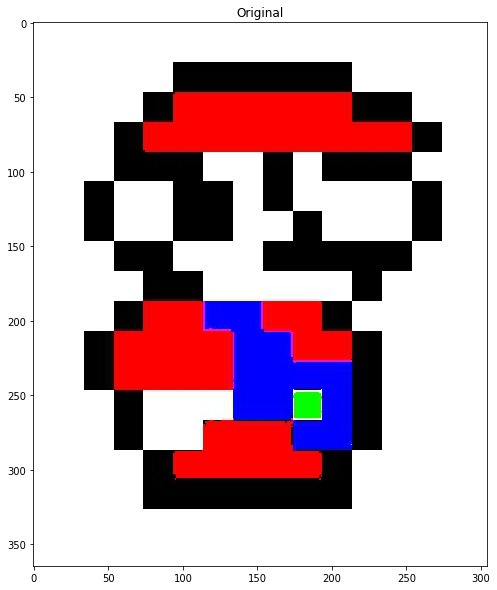

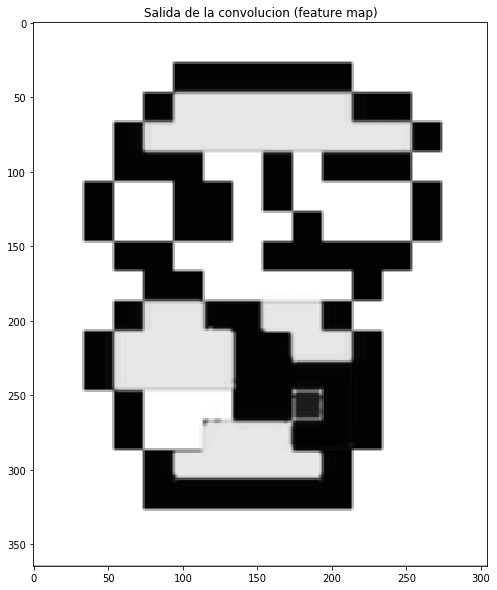

In [38]:
##MODIFICA LAS VARIABLES STRIDE Y W PARA FILTRAR LA SEÑAL. 
##PRUEBA CAMBIANDO TANTO LOS VALORES DE W COMO SU TAMAÑO,
##PERO RECUERDA QUE SIEMPRE DEBE TENER UNA CANTIDAD IMPAR DE VALORES

# bordes horizontales
w_h = np.array([
    [-1,-1,-1],
    [2,2,2],
    [-1,-1,-1],
])

# bordes vertical
w_v = np.array([
    [-1,2,-1],
    [-1,2,-1],
    [-1,2,-1],
])

# detección de bordes, pasa alta
w_b = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1],
])

# sin modificación
wo = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
])

w_red= np.array([[1, 0, -1],
                 [1, 0, -1],
                 [1, 0, -1],
                ])

w_green= np.array([[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                  ])

w_blue= np.array([[0, 0, 0],
                  [0, 3, 0],
                  [0, 0, 0],
                 ])

# pruebas
w_red = wo * 10
w_blue = w_b
w_green = wo

w = np.stack([w_red,w_green,w_blue],axis=2)
pad_size=1
strides= (1,1)
##FIN MODIFICACION

image_name="mario.jpg"
# image_name="godzilla.jpg"
# image_name="mercedes.jpg"

x=io.imread(image_name)

y=conv2d(w,x,strides=strides,pad_size=pad_size)

plt.figure(figsize=(15,10))
plt.imshow(x)
plt.title("Original")
plt.figure(figsize=(15,10))
plt.imshow(y[:,:,0],cmap="gray")
plt.title("Salida de la convolucion (feature map)")
